<a href="https://colab.research.google.com/github/Anjali-Kumbhar/Anjali-Kumbhar/blob/main/Exp8_AI_45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Color assignment: [1, 2, 3, 2]


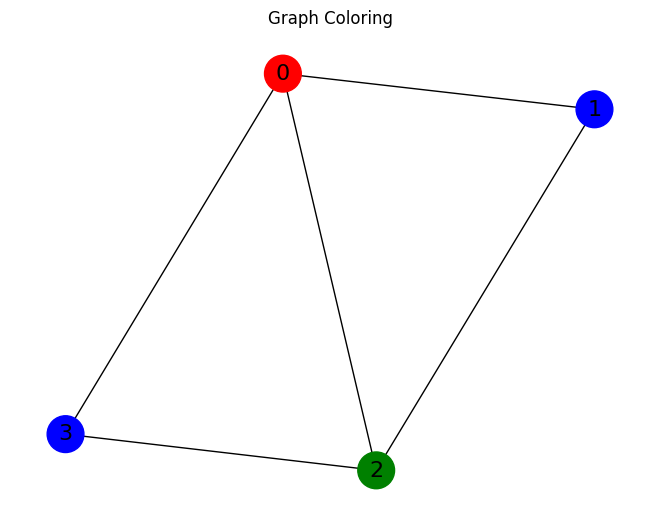

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def is_safe(graph, colors, vertex, color):
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and colors[i] == color:
            return False
    return True

def m_coloring_util(graph, m, colors, vertex):
    if vertex == len(graph):
        return True

    for color in range(1, m + 1):
        if is_safe(graph, colors, vertex, color):
            colors[vertex] = color
            if m_coloring_util(graph, m, colors, vertex + 1):
                return True
            colors[vertex] = 0  # Backtrack

    return False

def m_coloring(graph, m):
    colors = [0] * len(graph)
    if m_coloring_util(graph, m, colors, 0):
        return colors
    else:
        return None

def draw_graph(graph, colors):
    G = nx.Graph()
    num_vertices = len(graph)

    # Add nodes and edges
    for i in range(num_vertices):
        G.add_node(i)
        for j in range(num_vertices):
            if graph[i][j] == 1:
                G.add_edge(i, j)

    # Create a color map based on the assigned colors
    color_map = ['lightgrey'] * num_vertices
    for node in range(num_vertices):
        if colors[node] == 1:
            color_map[node] = 'red'
        elif colors[node] == 2:
            color_map[node] = 'blue'
        elif colors[node] == 3:
            color_map[node] = 'green'

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=700, font_size=16)
    plt.title("Graph Coloring")
    plt.show()

# Adjacency matrix for the given graph
graph = [
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0]
]

m = 3  # Number of colors
result = m_coloring(graph, m)

if result:
    print("Color assignment:", result)
    draw_graph(graph, result)
else:
    print("No solution exists.")